- This notebook is to get latent space for surfactants dataset by using smi-ted

In [1]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio

In [3]:
from surfactants_cmc import get_train_data, train_model

In [4]:
file_path = '../../data/surfpro_literature.csv'
data = pd.read_csv(file_path)
data

,SMILES,Surfactant_Type,CMC,pCMC,AW_ST_CMC,Gamma_max,Area_min,Pi_CMC,pC20,C20,...,SubRef_AW_ST_CMC,Ref_Gamma_max,Ref_Pi_CMC,Ref_Area_min,Ref_pC20,Ref_C20,IUPAC_name,InChI,InChIKey,Molecular_Weight
0,C(=Nc1cc[n+](CCCCCCCCCCCC[n+]2ccc(N=Cc3ccccc3)...,gemini cationic,NaN,NaN,41.0,NaN,NaN,NaN,NaN,NaN,...,10.1007/s11743-013-1478-9,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C36H44N4.2BrH/c1(3-5-7-15-25-39-27-21...,DPTDXTODPMJJNL-UHFFFAOYSA-L,690.193272
1,C(=Nc1cc[n+](CCCCCC[n+]2ccc(N=Cc3ccccc3)cc2)cc...,gemini cationic,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,...,10.1007/s11743-013-1478-9,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C30H32N4.2BrH/c1(9-19-33-21-15-29(16-...,AHXCMXJBNCLAHK-UHFFFAOYSA-L,606.099371
2,C(=Nc1cc[n+](CC[n+]2ccc(N=Cc3ccccc3)cc2)cc1)c1...,gemini cationic,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,...,10.1007/s11743-013-1478-9,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C26H24N4.2BrH/c1-3-7-23(8-4-1)21-27-2...,MVHGWIJZXNNERZ-UHFFFAOYSA-L,550.036771
3,C=CC(=O)OC(C[N+](C)(C)CCCCCCCCCCCC)C[N+](C)(C)...,gemini cationic,0.000790,3.102373,33.4,0.000001,1.12,38.6,3.836155,0.021576,...,10.1016/j.colsurfa.2013.12.079,10.1016/j.colsurfa.2013.12.079,NaN,10.1016/j.colsurfa.2013.12.079,calculated,calculated,"1,3-Bis(N,N-dimethyl-N-dodecylammonium)-2-prop...",InChI=1S/C34H70N2O2.2BrH/c1-8-11-13-15-17-19-2...,ARKWXUQYSTUBMC-UHFFFAOYSA-L,696.380404
4,C=CC(=O)OC(C[N+](C)(C)CCCCCCCCCCCCCC)C[N+](C)(...,gemini cationic,0.000240,3.619789,31.3,0.000001,1.19,40.7,4.483082,0.011299,...,10.1016/j.colsurfa.2013.12.079,10.1016/j.colsurfa.2013.12.079,NaN,10.1016/j.colsurfa.2013.12.079,calculated,calculated,"1,3-Bis(N,N-dimethyl-N-tetradecylammonium)-2-p...",InChI=1S/C38H78N2O2.2BrH/c1-8-11-13-15-17-19-2...,VTTIVKLPSBNYRL-UHFFFAOYSA-L,752.443004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,OCCOCCOCCOCCOCCOCCSCCC(F)(F)C(F)(F)C(F)(F)C(F)...,non-ionic,0.000037,4.432033,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"InChI=1S/C20H29F13O6S/c21-15(22,16(23,24)17(25...",VOCCWGUEVZCMEP-UHFFFAOYSA-N,644.147727
1620,OCCOCCOCCOCCSCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,non-ionic,0.000028,4.552997,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"2-[2-[2-[2-(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecaf...","InChI=1S/C16H21F13O4S/c17-11(18,1-9-34-10-8-33...",HVOWVEVSZCKCCE-UHFFFAOYSA-N,556.095297
1621,OCCOCCOCCSCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,non-ionic,0.000025,4.602060,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"2-[2-[2-(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluo...","InChI=1S/C14H17F13O3S/c15-9(16,1-7-31-8-6-30-5...",IOGSRXKLAFCVIR-UHFFFAOYSA-N,512.069082
1622,OCCOCCSCCOCCSCCOCCSCCC(F)(F)C(F)(F)C(F)(F)C(F)...,non-ionic,0.000026,4.585027,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"InChI=1S/C20H29F13O4S3/c21-15(22,16(23,24)17(2...",LPHAEYJKVNLDKF-UHFFFAOYSA-N,676.102039


In [25]:
info_path1 = '../../data/Info.csv'
df_info1 = pd.read_csv(info_path1)

info_path2 = '../../data/info_new_molecules.csv'
df_info2 = pd.read_csv(info_path2)

In [26]:
df_info2

,ID,Name,Molecular_Formula,InChI,SMILES
0,A1,Decanal,C10H20O,InChI=1S/C10H20O/c1-2-3-4-5-6-7-8-9-10-11/h10H...,CCCCCCCCCC=O
1,A2,Geraniol,C10H18O,"InChI=1S/C10H18O/c1-9(2)5-4-6-10(3)7-8-11/h5,7...",CC(=CCC/C(=C/CO)/C)C
2,A3,Hexadecanoic acid,C16H32O2,InChI=1S/C16H32O2/c1-2-3-4-5-6-7-8-9-10-11-12-...,CCCCCCCCCCCCCCCC(=O)O
3,A4,Myristoleic acid,C14H26O2,InChI=1S/C14H26O2/c1-2-3-4-5-6-7-8-9-10-11-12-...,CCCC/C=C\CCCCCCCC(=O)O
4,A5,Glycine octylester,C10H22ClNO2,InChI=1S/C10H21NO2.ClH/c1-2-3-4-5-6-7-8-13-10(...,CCCCCCCCOC(=O)CN.Cl
5,A6,Perfluorooctanoic acid,C8HF15O2,"InChI=1S/C8HF15O2/c9-2(10,1(24)25)3(11,12)4(13...",C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F...
6,A7,"1H,1H,2H,2H-Tridecafluorooctane-1-sulphonic acid",C8H5F13O3S,"InChI=1S/C8H5F13O3S/c9-3(10,1-2-25(22,23)24)4(...",C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)...
7,A8,Heptadecafluorooctanesulfonic acid potassium salt,C8F17KO3S,"InChI=1S/C8HF17O3S.K/c9-1(10,3(13,14)5(17,18)7...",C(C(C(C(C(F)(F)S(=O)(=O)[O-])(F)F)(F)F)(F)F)(C...


In [5]:
df_ = data.iloc[:, [0, 1, 3]]
df_cleaned = df_.dropna()
df_data = df_cleaned.reset_index(drop=True)
df_data

,SMILES,Surfactant_Type,pCMC
0,C=CC(=O)OC(C[N+](C)(C)CCCCCCCCCCCC)C[N+](C)(C)...,gemini cationic,3.102373
1,C=CC(=O)OC(C[N+](C)(C)CCCCCCCCCCCCCC)C[N+](C)(...,gemini cationic,3.619789
2,C=CC(=O)OC(C[N+](C)(C)CCCCCCCCCCCCCCCC)C[N+](C...,gemini cationic,4.508638
3,C=CC(=O)OCC[N+](C)(C)CCCCCCCCCCCC.[Br-],cationic,2.384050
4,C=CC(=O)OCC[N+](C)(C)CCCCCCCCCCCCCC.[Br-],cationic,2.899629
...,...,...,...
1390,OCCOCCOCCOCCOCCOCCSCCC(F)(F)C(F)(F)C(F)(F)C(F)...,non-ionic,4.432033
1391,OCCOCCOCCOCCSCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,non-ionic,4.552997
1392,OCCOCCOCCSCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,non-ionic,4.602060
1393,OCCOCCSCCOCCSCCOCCSCCC(F)(F)C(F)(F)C(F)(F)C(F)...,non-ionic,4.585027


In [6]:
x_emb_frame, df_total = get_train_data(df_data)

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


/Users/haoliu/anaconda3/envs/chemprop/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
100%|██████████| 13/13 [00:32<00:00,  2.53s/it]


Train size: (1116, 770)
Test size: (279, 770)
Surfactant_Type
gemini cationic          398
non-ionic                225
anionic                  191
cationic                 189
sugar-based non-ionic     80
zwitterionic              17
gemini zwitterionic       14
gemini anionic             2
Name: count, dtype: int64
Surfactant_Type
gemini cationic          99
non-ionic                56
anionic                  48
cationic                 48
sugar-based non-ionic    20
zwitterionic              4
gemini zwitterionic       3
gemini anionic            1
Name: count, dtype: int64
RMSE score : 0.5195861994353487
R2 score : 0.7564225383257583


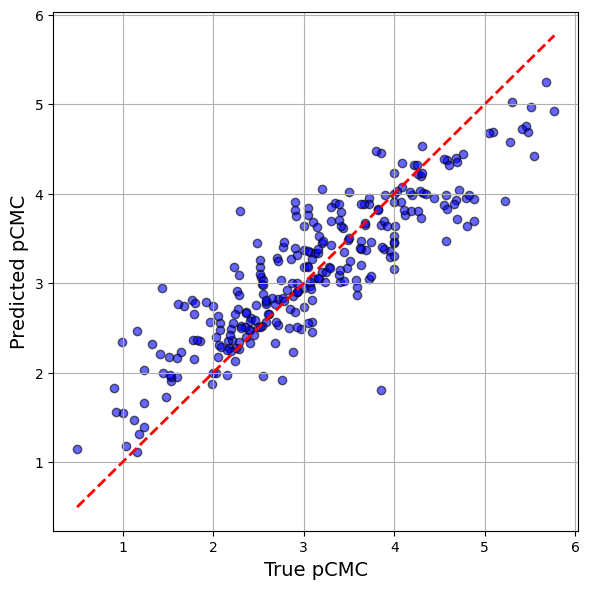

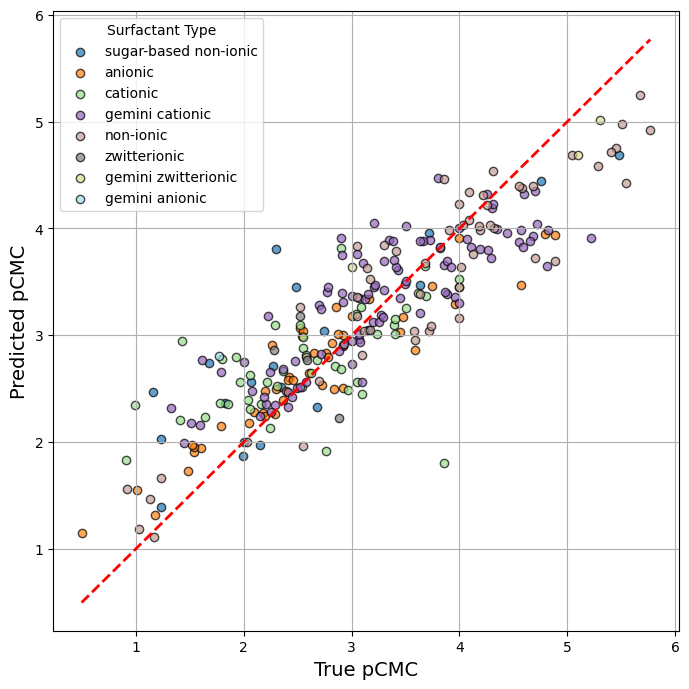

In [7]:
model, RMSE, r2, train_df, test_df = train_model(df_total, property='pCMC')

In [12]:
df_total

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,Surfactant_Type,pCMC
0,0.316224,-0.607016,0.064007,0.354682,0.612596,-0.583472,1.157591,0.100974,0.906317,0.178776,...,0.311829,0.328249,-0.649204,0.578091,-0.659988,0.659678,0.592834,-0.139048,gemini cationic,3.102373
1,0.297257,-0.590087,0.063313,0.340966,0.614565,-0.582135,1.148290,0.124246,0.887901,0.178734,...,0.312845,0.323760,-0.633981,0.575165,-0.665397,0.660196,0.565780,-0.146689,gemini cationic,3.619789
2,0.277743,-0.600162,0.082801,0.329802,0.629946,-0.573500,1.142581,0.116861,0.890986,0.184743,...,0.294953,0.322267,-0.630359,0.588270,-0.681033,0.662238,0.552585,-0.167076,gemini cationic,4.508638
3,0.294121,-0.594994,0.091799,0.375703,0.582878,-0.601765,1.212082,0.121437,0.884056,0.222603,...,0.301488,0.339867,-0.607772,0.561617,-0.640617,0.744401,0.601170,-0.090645,cationic,2.384050
4,0.292429,-0.588739,0.085767,0.366590,0.594064,-0.600268,1.213634,0.117407,0.883085,0.218156,...,0.300876,0.347810,-0.608051,0.563517,-0.646699,0.733216,0.594791,-0.104502,cationic,2.899629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.315429,-0.428648,0.139677,0.349758,0.542107,-0.631468,1.011472,0.152829,0.898131,0.115644,...,0.112387,0.298349,-0.526001,0.541865,-0.801553,0.717981,0.545537,-0.192814,non-ionic,4.432033
1391,0.328160,-0.447582,0.114976,0.365660,0.546039,-0.619756,1.019459,0.153338,0.893852,0.115630,...,0.131880,0.323831,-0.526206,0.549387,-0.803292,0.736138,0.514282,-0.172097,non-ionic,4.552997
1392,0.342262,-0.434655,0.129962,0.373835,0.559745,-0.622220,1.002394,0.152475,0.895084,0.096613,...,0.119885,0.321903,-0.519230,0.551452,-0.795658,0.729936,0.516836,-0.160247,non-ionic,4.602060
1393,0.342196,-0.449891,0.133653,0.351344,0.523874,-0.641626,1.041021,0.162885,0.887348,0.096127,...,0.112721,0.291464,-0.574533,0.558885,-0.812907,0.719481,0.592681,-0.187548,non-ionic,4.585027


In [9]:
df_total.to_csv('df_total_surfactants_smi-ted_20250709.csv', index=False)

In [33]:
import pickle

filename = 'regression_model_surfactants.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)